In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Trainer

In [2]:
TRAINER_RESULTS = {
    # "MinAtar/DQN": "shapley/minatar_dqn/trainer_shapley_final.csv",
    # "MinAtar/Ordered/DQN[NR]": "shapley/minatar_ordered_dqn/trainer_nowak_radzik_final.csv",
    # "MinAtar/Ordered/DQN[SB]": "shapley/minatar_ordered_dqn/trainer_sanchez_bergantinos_final.csv",
    "ASIPD": { 
        "file": "shapley/sipd_ppo/trainer_shapley_final.csv", 
        "shortens": {
            "SIPD/AlwaysCooperate-Default-v0": "Cooperator",
            "SIPD/AlwaysDefect-Default-v0": "Defector",
            "SIPD/TitForTat-Default-v0": "TitForTat",
            "SIPD/WinStayLoseSwitch-Default-v0": "WinLoseSwicth",
            "SIPD/ExtortionateZD-Default-v0": "ZD-Extortioner", 
        }, 
        "type": "players"
    },
    "ASIPD-OSB": { 
        "file": "shapley/sipd_ordered_ppo/trainer_sanchez_bergantinos_final.csv", 
        "shortens": {
            "SIPD/AlwaysCooperate-Default-v0": "Cooperator",
            "SIPD/AlwaysDefect-Default-v0": "Defector",
            "SIPD/TitForTat-Default-v0": "TitForTat",
            "SIPD/WinStayLoseSwitch-Default-v0": "WinLoseSwicth",
            "SIPD/ExtortionateZD-Default-v0": "ZD-Extortioner", 
        }, 
        "type": "players"
    },
    "ASIPD-ONR": { 
        "file": "shapley/sipd_ordered_ppo/trainer_nowak_radzik_final.csv", 
        "shortens": {
            "SIPD/AlwaysCooperate-Default-v0": "Cooperator",
            "SIPD/AlwaysDefect-Default-v0": "Defector",
            "SIPD/TitForTat-Default-v0": "TitForTat",
            "SIPD/WinStayLoseSwitch-Default-v0": "WinLoseSwicth",
            "SIPD/ExtortionateZD-Default-v0": "ZD-Extortioner", 
        }, 
        "type": "players"
    },
    # # "SparseIPD/Ordered/PPO[NR]": "shapley/sipd_ordered_ppo/trainer_nowak_radzik_final.csv",
    # # "SparseIPD/Ordered/PPO[SB]": "shapley/sipd_ordered_ppo/trainer_sanchez_bergantinos_final.csv"
    "MinAtar": {
        "file": "shapley/minatar_dqn/trainer_shapley_final.csv", 
        "shortens": {
            "MinAtar/Asterix-v0": "Asterix",
            "MinAtar/Breakout-v0": "Breakout",
            "MinAtar/Freeway-v0": "Freeway",
            "MinAtar/Seaquest-v0": "Sequest",
            "MinAtar/SpaceInvaders-v0": "SpaceInvaders"
        }, 
        "type": "games" 
    },
    "MinAtar-OSB": {
        "file": "shapley/minatar_ordered_dqn/trainer_sanchez_bergantinos_final.csv", 
        "shortens": {
            "MinAtar/Asterix-v0": "Asterix",
            "MinAtar/Breakout-v0": "Breakout",
            "MinAtar/Freeway-v0": "Freeway",
            "MinAtar/Seaquest-v0": "Sequest",
            "MinAtar/SpaceInvaders-v0": "SpaceInvaders"
        }, 
        "type": "games" 
    },
    "MinAtar-ONR": {
        "file": "shapley/minatar_ordered_dqn/trainer_nowak_radzik_final.csv", 
        "shortens": {
            "MinAtar/Asterix-v0": "Asterix",
            "MinAtar/Breakout-v0": "Breakout",
            "MinAtar/Freeway-v0": "Freeway",
            "MinAtar/Seaquest-v0": "Sequest",
            "MinAtar/SpaceInvaders-v0": "SpaceInvaders"
        }, 
        "type": "games" 
    },
    "MNIST": {
        "file": "shapley/mnist_sgd/trainer_shapley_final.csv", 
        "shortens": {
            "2": "Digit2",
            "3": "Digit3",
            "4": "Digit4",
            "5": "Digit5",
            "7": "Digit7"
        }, 
        "type": "class"
    },
    "CIFAR10": {
        "file": "shapley/cifar10_sgd/trainer_shapley_final.csv", 
        "shortens": {
            "1": "Car",
            "3": "Cat",
            "4": "Deer",
            "5": "Dog",
            "6": "Frog",
            "7": "Horse"
        }, 
        "type": "class"
    },
    "MiniGrid-Rooms": { 
        "file": "shapley/grids_ppo/trainer_shapley_final.csv", 
        "shortens": {
            "MiniGrid-MultiRoom-N2-S4-v0": "Two-Rooms",
            "MiniGrid-MultiRoom-N4-S5-v0": "FourRooms",
            "MiniGrid-MultiRoom-N6-v0": "SixRooms",
        }, 
        "type": "grid"
    },
    "MiniGrid-Rooms-NR": { 
        "file": "shapley/grids_ppo_ordered/trainer_nowak_radzik_final.csv", 
        "shortens": {
            "MiniGrid-MultiRoom-N2-S4-v0": "Two-Rooms",
            "MiniGrid-MultiRoom-N4-S5-v0": "FourRooms",
            "MiniGrid-MultiRoom-N6-v0": "SixRooms",
        }, 
        "type": "grid"
    },
    "MiniGrid-Rooms-SB": { 
        "file": "shapley/grids_ppo_ordered/trainer_sanchez_bergantinos_final.csv", 
        "shortens": {
            "MiniGrid-MultiRoom-N2-S4-v0": "Two-Rooms",
            "MiniGrid-MultiRoom-N4-S5-v0": "FourRooms",
            "MiniGrid-MultiRoom-N6-v0": "SixRooms",
        }, 
        "type": "grid"
    }
}

In [3]:
def set_size(width, fraction=1):
    """Set figure dimensions to avoid scaling in LaTeX.

    Parameters
    ----------
    width: float
            Document textwidth or columnwidth in pts
    fraction: float, optional
            Fraction of the width which you wish the figure to occupy

    Returns
    -------
    fig_dim: tuple
            Dimensions of figure in inches
    """
    # Width of figure (in pts)
    fig_width_pt = width * fraction

    # Convert from pt to inches
    inches_per_pt = 1 / 72.27

    # Golden ratio to set aesthetic figure height
    # https://disq.us/p/2940ij3
    golden_ratio = (5**.5 - 1) / 2

    # Figure width in inches
    fig_width_in = fig_width_pt * inches_per_pt
    # Figure height in inches
    fig_height_in = fig_width_in * golden_ratio

    fig_dim = (fig_width_in, fig_height_in)

    return fig_dim

In [4]:
def display_shapley(file: str, title: str, shortens: dict[str, str] = None, player_type: str = ""):
    df = pd.read_csv(
        file,
        index_col=0
    )
    # only against pure eval strategies

    df.index = df.index.map(str)
    all_colum = df['+'.join(df.index)]
    df = df[df.index]
    df['all'] = all_colum
    
    if shortens:
        df = df.rename(columns=shortens, index=shortens)
        
    # plt.figure()
    # display(df)
    with sns.plotting_context("notebook"): 
        plt.figure(figsize=set_size(397.48499))
        hm = sns.heatmap(
            df,
            cmap='Blues', 
            linewidths=0.01, 
            annot=True, 
            fmt='.3f',
            cbar=False,
            vmin=df.min().min(), vmax=df.max().max(),
        )
        hm.set(
            xlabel=r"$\phi_{\bar{\bf{u}}}$", ylabel=r"$\bf{units}$" + f" [{player_type}]", 
            title=r"$\bf{targets}~[\bar{\bf{u}}]$"
        )
        # hm.autoscale(True)
        hm.tick_params(top=True, bottom=False,
                    labeltop=True, labelbottom=False)
        plt.setp(hm.get_xticklabels(), rotation=-15, ha="center",
                    rotation_mode="anchor")
        plt.setp(hm.get_yticklabels(), rotation=0, ha="right",
                    rotation_mode="anchor")
        for idx, _ in enumerate(df.columns):
            plt.gca().axvline(idx, lw=8, color='white')
    plt.savefig(
        os.path.join(os.path.dirname(file), f"{title}.pdf"),
        bbox_inches='tight',
        format='pdf'
    )

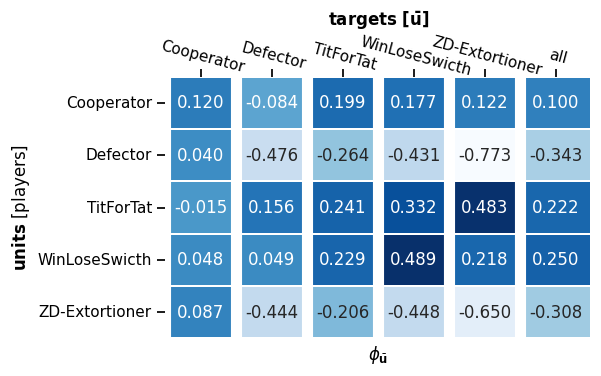

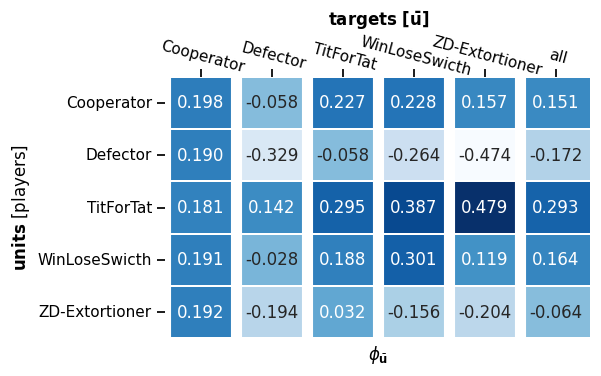

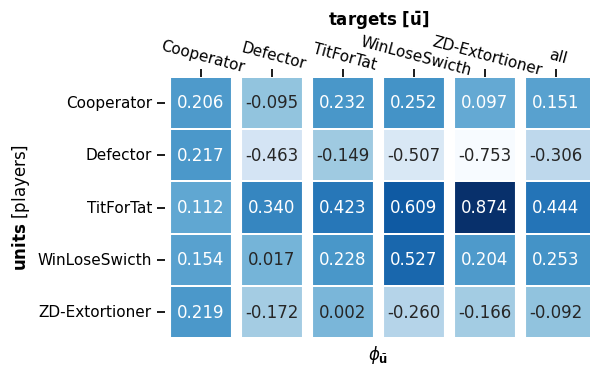

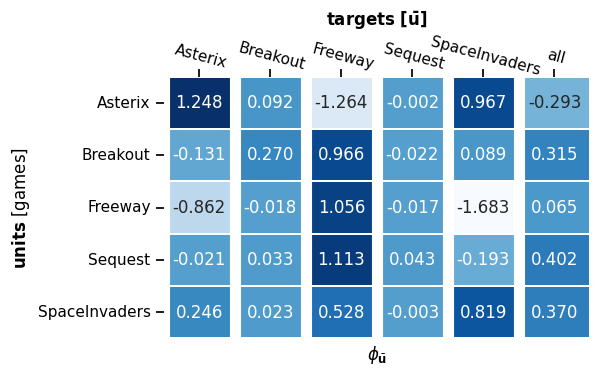

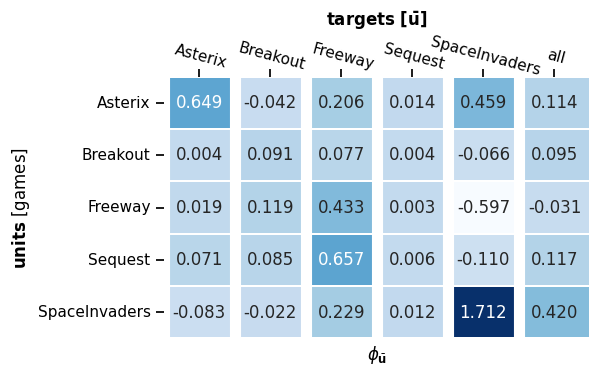

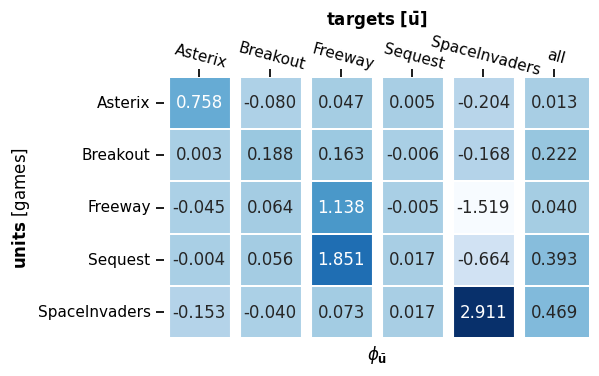

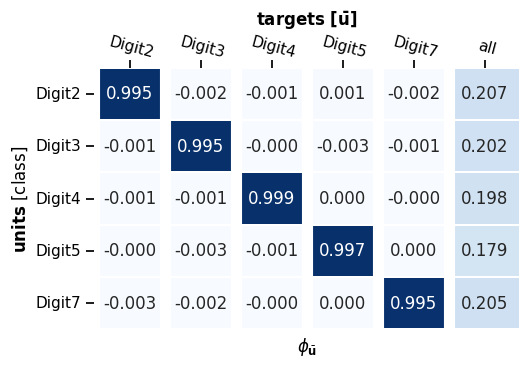

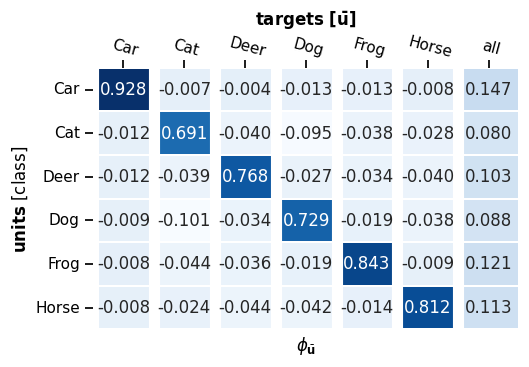

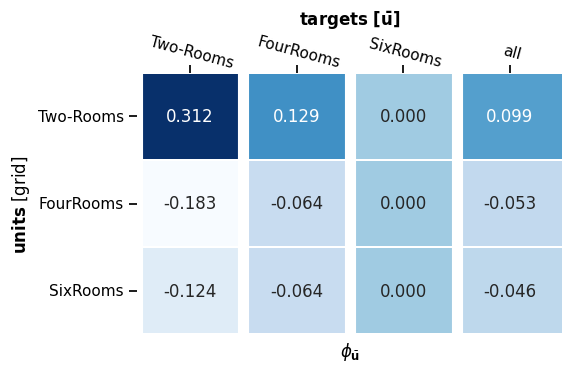

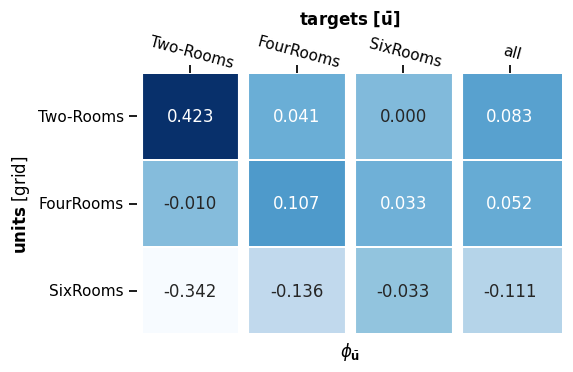

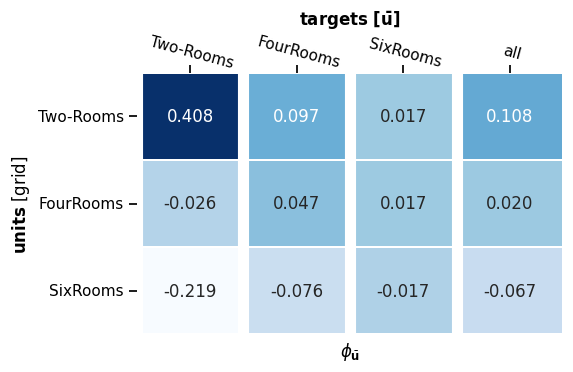

In [5]:
for result in TRAINER_RESULTS:
    display_shapley(
        file=TRAINER_RESULTS[result]['file'], 
        title=result, 
        shortens=TRAINER_RESULTS[result]['shortens'],
        player_type=TRAINER_RESULTS[result]['type']
    )